In [1]:
import psycopg2 as pg
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL

import seaborn as sns
import pandas as pd
from IPython.display import JSON
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
params = {
    "drivername": "postgresql+psycopg2",
    "host": "127.0.0.53",
    "database": "MercadoLivre",
    "username": "postgres",
    "password": "changeme"
}

url = URL.create(**params)

# Create an engine instance
alchemyEngine = create_engine(url, pool_recycle=3600);

# Connect to PostgreSQL server
dbConnection = alchemyEngine.connect();

# Read data from PostgreSQL database table and load into a DataFrame instance
df_items = pd.read_sql("select * from public.items limit 1000", dbConnection);
df_base_categories = pd.read_sql("select * from public.base_categories limit 1000", dbConnection);
df_categories = pd.read_sql("select * from public.categories limit 1000", dbConnection)

# Close the database connection
dbConnection.close();

In [7]:
df_base_categories = pd.json_normalize(df_base_categories['category_json'])
df_base_categories.to_csv('examples/base_categries.csv')
df_base_categories.head(3)

,id,name
0,MLB5672,Acessórios para Veículos
1,MLB271599,Agro
2,MLB1403,Alimentos e Bebidas


In [8]:
df_categories.head(3)

,site_id,category_id,last_run,category_json
0,MLB,264035,2022-07-19,"{'id': 'MLB264035', 'name': 'Aquecedores De Ma..."
1,MLB,224271,2022-07-19,"{'id': 'MLB224271', 'name': 'Babadores', 'pict..."
2,MLB,264021,2022-07-19,"{'id': 'MLB264021', 'name': 'Bombinhas de Tira..."


In [9]:
df_categories = pd.json_normalize(df_categories['category_json'])

df_categories.set_index('id')
df_categories = df_categories.convert_dtypes()
toDrop = [
	"picture",
	"meta_categ_id",
	"settings.coverage_areas",
	"settings.max_description_length",
	"settings.max_pictures_per_item",	
	"settings.max_pictures_per_item_var",	
	"settings.max_sub_title_length",	
	"settings.max_title_length",	
	"settings.max_variations_allowed",
	"settings.maximum_price",
	"settings.maximum_price_currency",	
	"settings.minimum_price",	
	"settings.minimum_price_currency"
]
df_categories.drop(columns=toDrop, inplace=True)
df_categories.to_csv('categries.csv')
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  372 non-null    string 
 1   name                                372 non-null    string 
 2   permalink                           0 non-null      object 
 3   total_items_in_this_category        372 non-null    Int64  
 4   path_from_root                      372 non-null    object 
 5   children_categories                 372 non-null    object 
 6   attribute_types                     372 non-null    string 
 7   channels_settings                   372 non-null    object 
 8   attributable                        372 non-null    boolean
 9   date_created                        372 non-null    string 
 10  settings.adult_content              372 non-null    boolean
 11  settings.buying_allowed             372 non-n

In [10]:
df_categories.head(3)

,id,name,permalink,total_items_in_this_category,path_from_root,children_categories,attribute_types,channels_settings,attributable,date_created,settings.adult_content,settings.buying_allowed,settings.buying_modes,settings.catalog_domain,settings.currencies,settings.fragile,settings.immediate_payment,settings.item_conditions,settings.items_reviews_allowed,settings.listing_allowed,settings.mirror_category,settings.mirror_master_category,settings.mirror_slave_categories,settings.price,settings.reservation_allowed,settings.restrictions,settings.rounded_address,settings.seller_contact,settings.shipping_options,settings.shipping_profile,settings.show_contact_information,settings.simple_shipping,settings.stock,settings.sub_vertical,settings.subscribable,settings.tags,settings.vertical,settings.vip_subdomain,settings.buyer_protection_programs,settings.status
0,MLB264035,Aquecedores De Mamadeiras,None,1459,"[{'id': 'MLB1384', 'name': 'Bebês'}, {'id': 'M...",[],variations,"[{'channel': 'mshops', 'settings': {'minimum_p...",False,2018-04-25T08:12:56.000Z,False,True,"[auction, buy_it_now]",MLB-BABY_BOTTLE_WARMERS,[BRL],False,required,"[new, not_specified, used]",False,True,<NA>,<NA>,[],required,not_allowed,[],False,not_allowed,"[custom, carrier]",optional,False,optional,required,None,False,[],<NA>,produto,[],enabled
1,MLB224271,Babadores,None,16911,"[{'id': 'MLB1384', 'name': 'Bebês'}, {'id': 'M...",[],variations,"[{'channel': 'mshops', 'settings': {'minimum_p...",False,2018-04-25T08:12:56.000Z,False,True,"[auction, buy_it_now]",MLB-BABY_BIBS,[BRL],False,required,"[new, not_specified, used]",False,True,<NA>,<NA>,[],required,not_allowed,[],False,not_allowed,"[custom, carrier]",optional,False,optional,required,None,False,[],<NA>,produto,[],enabled
2,MLB264021,Bombinhas de Tirar Leite,None,7326,"[{'id': 'MLB1384', 'name': 'Bebês'}, {'id': 'M...",[],attributes,"[{'channel': 'mshops', 'settings': {'minimum_p...",False,2018-04-25T08:12:56.000Z,False,True,"[auction, buy_it_now]",MLB-MILK_EXTRACTORS,[BRL],False,required,"[new, not_specified, used]",False,True,<NA>,<NA>,[],required,not_allowed,[],False,not_allowed,"[custom, carrier]",optional,False,optional,required,None,False,[],<NA>,produto,[],enabled


In [11]:
df_categories['children_categories_as_str'] = df_categories['children_categories'].astype(str)
df_sub_categories = df_categories.loc[df_categories['children_categories_as_str'] == '[]']
sub_categories = df_sub_categories['id'].tolist()

In [12]:
len(sub_categories)
sub_categories[0]

'MLB264035'

# Items

In [13]:
df_items = pd.json_normalize(df_items['item_json'])
df_items.set_index('id')
toDrop = [
    "seller.car_dealer",
    "seller.real_estate_agency"
]
df_items.drop(columns=toDrop, inplace=True)
df_items.to_csv('examples/items.csv')
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 105 entries, id to seller.seller_reputation.metrics.delayed_handling_time.excluded.real_rate
dtypes: bool(4), float64(23), int64(12), object(66)
memory usage: 793.1+ KB


In [14]:
df_items.head(3)

,id,site_id,title,price,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,stop_time,condition,permalink,thumbnail,thumbnail_id,accepts_mercadopago,attributes,original_price,category_id,official_store_id,domain_id,catalog_product_id,tags,order_backend,use_thumbnail_id,offer_score,offer_share,match_score,winner_item_id,melicoin,discounts,seller.id,seller.permalink,seller.registration_date,seller.tags,seller.eshop.seller,seller.eshop.eshop_rubro,seller.eshop.eshop_id,seller.eshop.nick_name,seller.eshop.site_id,seller.eshop.eshop_logo_url,seller.eshop.eshop_status_id,seller.eshop.eshop_experience,seller.eshop.eshop_locations,seller.seller_reputation.power_seller_status,seller.seller_reputation.level_id,seller.seller_reputation.metrics.cancellations.period,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,seller.seller_reputation.metrics.claims.period,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.metrics.delayed_handling_time.period,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.delayed_handling_time.value,seller.seller_reputation.metrics.sales.period,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.period,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.completed,prices.id,prices.prices,prices.presentation.display_currency,prices.payment_method_prices,prices.reference_prices,prices.purchase_discounts,installments.quantity,installments.amount,installments.rate,installments.currency_id,address.state_id,address.state_name,address.city_id,address.city_name,shipping.free_shipping,shipping.mode,shipping.tags,shipping.logistic_type,shipping.store_pick_up,seller_address.id,seller_address.comment,seller_address.address_line,seller_address.zip_code,seller_address.country.id,seller_address.country.name,seller_address.state.id,seller_address.state.name,seller_address.city.id,seller_address.city.name,seller_address.latitude,seller_address.longitude,differential_pricing.id,catalog_listing,seller.seller_reputation.real_level,seller.seller_reputation.protection_end_date,seller.seller_reputation.metrics.cancellations.excluded.real_value,seller.seller_reputation.metrics.cancellations.excluded.real_rate,seller.seller_reputation.metrics.claims.excluded.real_value,seller.seller_reputation.metrics.claims.excluded.real_rate,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_rate
0,MLB2190981896,MLB,Triciclo Bicicleta Infantil Equlibrio S/ Pedal...,342.90,None,BRL,1,1,buy_it_now,gold_special,2042-02-23T04:00:00.000Z,new,https://produto.mercadolivre.com.br/MLB-219098...,http://http2.mlstatic.com/D_602355-MLB45077683...,602355-MLB45077683024_032021,True,"[{'name': 'Modelo alfanumérico', 'values': [{'...",499.0,MLB39567,515.0,MLB-KIDS_TRICYCLES,None,"[good_quality_picture, good_quality_thumbnail,...",1,True,None,None,None,None,None,None,84288564,http://perfil.mercadolivre.com.br/QUALITY_SP,2009-08-26T13:32:44.000-04:00,"[brand, large_seller, eshop, mshops, credits_p...",84288564.0,NaN,74614.0,QUALITY_SP,MLB,http://http2.mlstatic.com/eshops-logo/84288564...,1.0,0.0,[],platinum,5_green,60 days,0.0045,9,60 days,0.0209,41,60 days,0.0167,28,60 days,1803,2102,historic,24525,0.04,0.03,0.93,22423,MLB2190981896,"[{'id': '43', 'type': 'standard', 'amount': 38...",BRL,[],"[{'id': '44', 'type': 'min_standard', 'conditi...",[],12,33.24,16.34,BRL,BR-SP,São Paulo,BR-SP-95,Barueri,True,me2,"[self_service_in, mandatory_free_shipping]",cross_docking,False,,,,,BR,Brasil,BR-SP,São Paulo,BR-SP-95,Barueri,,,Na

# Item join Category

In [15]:
i_columns = [
    "category_id",
    "id",
    "title",
    "seller.id",
    "seller.permalink",
    "seller.registration_date",
    # "seller.car_dealer",
    # "seller.real_estate_agency",
    "seller.tags",
    "seller.eshop.seller",
    "seller.eshop.eshop_rubro",
    "seller.eshop.eshop_id",
    "seller.eshop.nick_name",
    "seller.eshop.site_id",
    "seller.eshop.eshop_logo_url",
    "seller.eshop.eshop_status_id",
    "seller.eshop.eshop_experience",
    "seller.eshop.eshop_locations",
    "seller.seller_reputation.power_seller_status",
    "seller.seller_reputation.level_id",
    # "seller.seller_reputation.metrics.cancellations",
    # "seller.seller_reputation.metrics.claims",
    # "seller.seller_reputation.metrics.delayed_handling_time",
    # "seller.seller_reputation.metrics.sales",
    "seller.seller_reputation.transactions.canceled",
    "seller.seller_reputation.transactions.period",
    "seller.seller_reputation.transactions.total",
    # "seller.seller_reputation.transactions.ratings",
    "seller.seller_reputation.transactions.completed",
    "address.state_name",
    "address.city_name"
]

c_columns = [
    "id",
    "name",
    # "picture",
    #"permalink",
    #"total_items_in_this_category",
    # "path_from_root",
    # "children_categories",
    # "children_categories_as_str"
]

In [21]:
df_items[i_columns].head(3)

,category_id,id,title,seller.id,seller.permalink,seller.registration_date,seller.tags,seller.eshop.seller,seller.eshop.eshop_rubro,seller.eshop.eshop_id,seller.eshop.nick_name,seller.eshop.site_id,seller.eshop.eshop_logo_url,seller.eshop.eshop_status_id,seller.eshop.eshop_experience,seller.eshop.eshop_locations,seller.seller_reputation.power_seller_status,seller.seller_reputation.level_id,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.period,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.completed,address.state_name,address.city_name
0,MLB39567,MLB2190981896,Triciclo Bicicleta Infantil Equlibrio S/ Pedal...,84288564,http://perfil.mercadolivre.com.br/QUALITY_SP,2009-08-26T13:32:44.000-04:00,"[brand, large_seller, eshop, mshops, credits_p...",84288564.0,NaN,74614.0,QUALITY_SP,MLB,http://http2.mlstatic.com/eshops-logo/84288564...,1.0,0.0,[],platinum,5_green,2102,historic,24525,22423,São Paulo,Barueri
1,MLB39567,MLB2178771153,Triciclo Infantil Carrinho Passeio Bebê Com Em...,319045482,http://perfil.mercadolivre.com.br/ESHOP+NEW,2018-05-04T12:54:52.000-04:00,"[normal, mshops, credits_profile, messages_as_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,platinum,5_green,710,historic,12393,11683,São Paulo,Mogi das Cruzes
2,MLB39567,MLB1977517846,Triciclo Zootico Froggy Bandeirante,307904810,http://perfil.mercadolivre.com.br/LOJAS+BRASEIRO,2018-03-14T12:14:13.000-04:00,"[normal, mshops, credits_profile, messages_as_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,silver,5_green,183,historic,2562,2379,Rio de Janeiro,Itaperuna


In [22]:
df_categories[c_columns].head(3)

,id,name
0,MLB264035,Aquecedores De Mamadeiras
1,MLB224271,Babadores
2,MLB264021,Bombinhas de Tirar Leite


In [23]:
df_sellers = df_categories[c_columns].merge(df_items[i_columns], left_on="id", right_on="category_id")
df_sellers.drop(columns=["category_id"], inplace=True)
df_sellers.rename(columns={"id_x": "category_id"}, inplace=True)
df_sellers.rename(columns={"id_y": "product_id"}, inplace=True)
df_sellers['seller.permalink.nick_name'] = df_sellers["seller.permalink"].str.replace(pat='http://perfil.mercadolivre.com.br/', repl='', regex=False).str.replace(pat='+', repl=' ', regex=False)
df_sellers.head(3)

,category_id,name,product_id,title,seller.id,seller.permalink,seller.registration_date,seller.tags,seller.eshop.seller,seller.eshop.eshop_rubro,seller.eshop.eshop_id,seller.eshop.nick_name,seller.eshop.site_id,seller.eshop.eshop_logo_url,seller.eshop.eshop_status_id,seller.eshop.eshop_experience,seller.eshop.eshop_locations,seller.seller_reputation.power_seller_status,seller.seller_reputation.level_id,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.period,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.completed,address.state_name,address.city_name,seller.permalink.nick_name
0,MLB420335,Triciclos,MLB2616231195,Triciclo Infantil Nathor Charm Colorida - 1005...,60761282,http://perfil.mercadolivre.com.br/MEGAMUNDO+MA...,2008-11-13T12:24:19.000-04:00,"[normal, credits_profile, eshop, medium_seller...",60761282.0,NaN,194963.0,LOJA MEGASTORE,MLB,http://http2.mlstatic.com/eshops-logo/60761282...,1.0,0.0,[],platinum,5_green,5701,historic,96518,90817,São Paulo,Mogi Guaçu,MEGAMUNDO MAGAZINE
1,MLB420335,Triciclos,MLB2612403035,Triciclo Velobaby G2 Banirante Passeio E Pedal...,304459049,http://perfil.mercadolivre.com.br/GRUPORIHAPPY,2018-02-26T13:38:57.000-04:00,"[brand, large_seller, credits_profile, message...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,platinum,5_green,1101,historic,22255,21154,São Paulo,Araçariguama,GRUPORIHAPPY
2,MLB420335,Triciclos,MLB1332663544,Carrinho Passeio Triciclo Infantil Com Empurra...,175209176,http://perfil.mercadolivre.com.br/LOJA+CUBA,2015-01-17T10:48:39.000-04:00,"[brand, large_seller, developer, credits_profi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,platinum,5_green,1060,historic,17865,16805,São Paulo,Botucatu,LOJA CUBA


In [24]:
df_unique_sellers = df_sellers.drop_duplicates(subset=['seller.id', 'category_id'])
df_unique_sellers.to_csv('examples/sellers.csv')
df_unique_sellers.head(3)

,category_id,name,product_id,title,seller.id,seller.permalink,seller.registration_date,seller.tags,seller.eshop.seller,seller.eshop.eshop_rubro,seller.eshop.eshop_id,seller.eshop.nick_name,seller.eshop.site_id,seller.eshop.eshop_logo_url,seller.eshop.eshop_status_id,seller.eshop.eshop_experience,seller.eshop.eshop_locations,seller.seller_reputation.power_seller_status,seller.seller_reputation.level_id,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.period,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.completed,address.state_name,address.city_name,seller.permalink.nick_name
0,MLB420335,Triciclos,MLB2616231195,Triciclo Infantil Nathor Charm Colorida - 1005...,60761282,http://perfil.mercadolivre.com.br/MEGAMUNDO+MA...,2008-11-13T12:24:19.000-04:00,"[normal, credits_profile, eshop, medium_seller...",60761282.0,NaN,194963.0,LOJA MEGASTORE,MLB,http://http2.mlstatic.com/eshops-logo/60761282...,1.0,0.0,[],platinum,5_green,5701,historic,96518,90817,São Paulo,Mogi Guaçu,MEGAMUNDO MAGAZINE
1,MLB420335,Triciclos,MLB2612403035,Triciclo Velobaby G2 Banirante Passeio E Pedal...,304459049,http://perfil.mercadolivre.com.br/GRUPORIHAPPY,2018-02-26T13:38:57.000-04:00,"[brand, large_seller, credits_profile, message...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,platinum,5_green,1101,historic,22255,21154,São Paulo,Araçariguama,GRUPORIHAPPY
2,MLB420335,Triciclos,MLB1332663544,Carrinho Passeio Triciclo Infantil Com Empurra...,175209176,http://perfil.mercadolivre.com.br/LOJA+CUBA,2015-01-17T10:48:39.000-04:00,"[brand, large_seller, developer, credits_profi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,platinum,5_green,1060,historic,17865,16805,São Paulo,Botucatu,LOJA CUBA


<AxesSubplot:xlabel='seller.seller_reputation.level_id', ylabel='Count'>

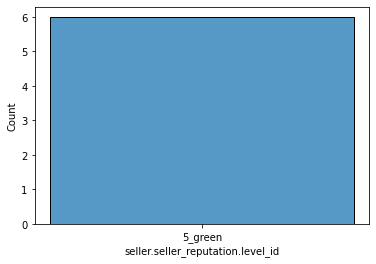

In [25]:
sns.histplot(data=df_unique_sellers, x="seller.seller_reputation.level_id")

<AxesSubplot:xlabel='seller.seller_reputation.power_seller_status', ylabel='Count'>

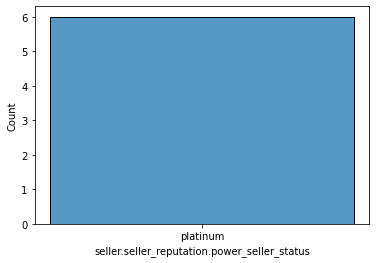

In [26]:
sns.histplot(data=df_unique_sellers, x="seller.seller_reputation.power_seller_status")